## Module5-HW

- Use the `train.csv` data to train and `test.csv` data to report your testing results.
- Your target variable is `SalePrice`
- Report summary information about your data:
- - Report min, max, mean of your numerical features (use `describe` method)
- - Create scatter (with respect to target variable) and box plots of your variables
- - Check the correlations between your variables and the target variable

- Split your data into train and test (Keep in mind that this test data will only be used for training purposes. you are going to report your test result on the `test.csv` file, not on this test data that you obtained from the training data)
- Train your transformers on the train data set. You may choose to use pipeline and column transformer at this step. 
- - scaler
- - polynomial transformer
- - OneHot Encoder
- - Simple Imputer
- Train Linear regression. Ridge Regression, and Lasso Regression models
- Optimize the `alpha` parameter for Ridge and Lasso Regressors
- Visualize the coefficients of the three models as we did in class
- Check which variables are eliminated with Lasso regression. Check the correlation values for these eliminated variables (you got the correlation values from an earlier step)

In [1]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the training data
print(train_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [2]:
# Get summary statistics for numerical features
summary_stats = train_data.describe()
print(summary_stats[['SalePrice']])  # Focus on SalePrice

           SalePrice
count    1460.000000
mean   180921.195890
std     79442.502883
min     34900.000000
25%    129975.000000
50%    163000.000000
75%    214000.000000
max    755000.000000


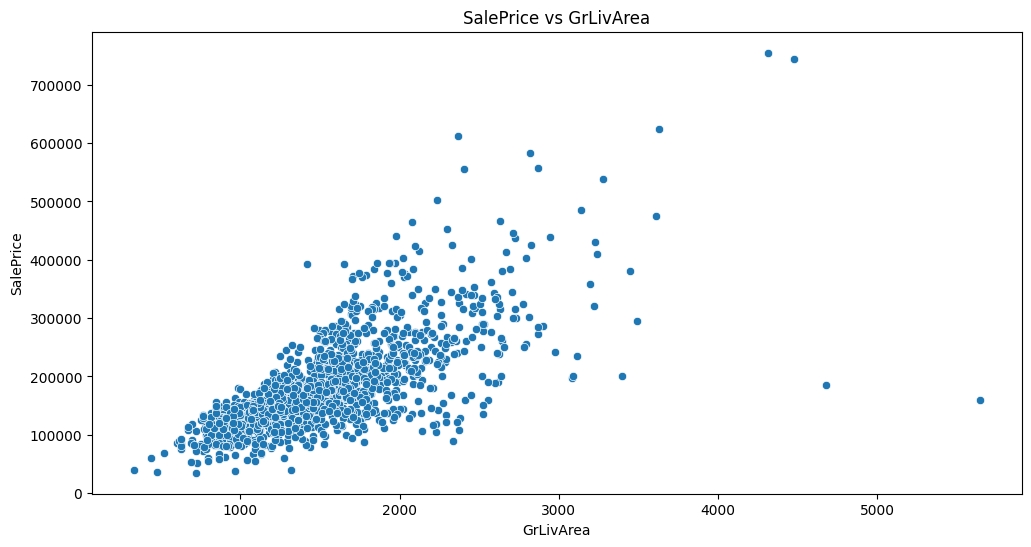

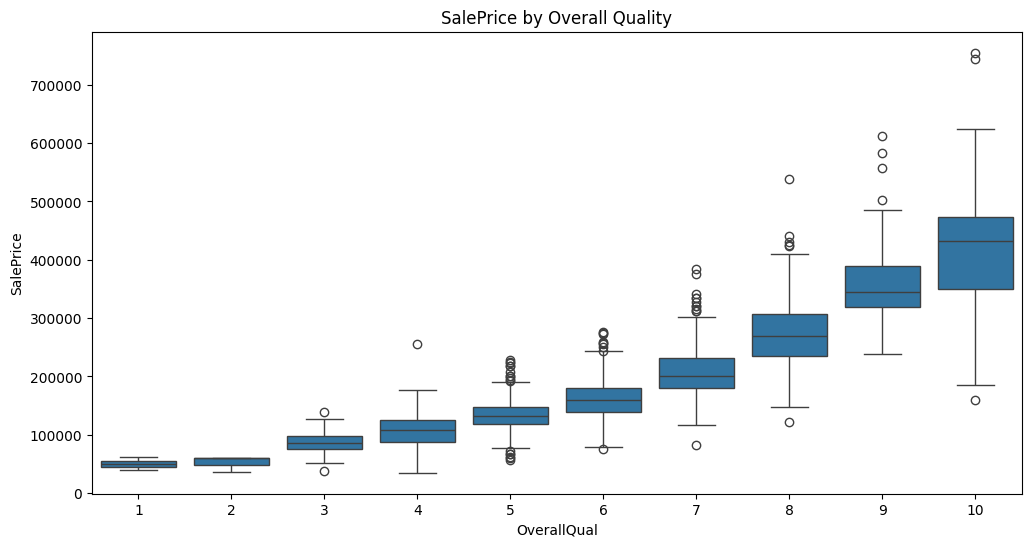

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots for selected numerical features against SalePrice
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train_data, x='GrLivArea', y='SalePrice')
plt.title('SalePrice vs GrLivArea')
plt.show()

# Box plots for selected categorical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='OverallQual', y='SalePrice')
plt.title('SalePrice by Overall Quality')
plt.show()


In [ ]:
# Calculate correlation
correlation_matrix = train_data.corr()
saleprice_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(saleprice_corr)

In [7]:
from sklearn.model_selection import train_test_split

# Split the train data into training and validation sets
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.impute import SimpleImputer

# Define numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Create the preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Create pipelines for each model
lin_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', LinearRegression())])

ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', Ridge())])

lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', Lasso())])

# Fit Linear Regression
lin_reg_pipeline.fit(X_train, y_train)

# Optimize Ridge Regression with GridSearchCV
ridge_param_grid = {'model__alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5)
ridge_grid.fit(X_train, y_train)

# Optimize Lasso Regression with GridSearchCV
lasso_param_grid = {'model__alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_grid = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5)
lasso_grid.fit(X_train, y_train)


C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.551e+10, tolerance: 5.374e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.693e+10, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['Id',
                                                                          'MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'YearRemodAdd',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'Bsmt...
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'Condition2',
                                                                          'BldgType',
                                                                          'HouseStyle',
                                                                          'RoofStyle',
                                                                          'RoofMatl',
                                                                          'Exterior1st',
                                                                          'Exterior2nd',
                                                                          'MasVnrType',
                                                                          'ExterQual',
                                                                          'ExterCond',
                                                                          'Foundation',
                                                                          'BsmtQual',
                                                                          'BsmtCond',
                                                                          'BsmtExposure',
                                                                          'BsmtFinType1',
                                                                          'BsmtFinType2',
                                                                          'Heating',
                                                                          'HeatingQC',
                                                                          'CentralAir',
                                                                          'Electrical', ...])])),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [0.1, 1.0, 10.0, 100.0]})

In [ ]:
# Function to visualize coefficients
def plot_coefficients(model, feature_names, title):
    coefficients = model.named_steps['model'].coef_
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients)
    plt.title(title)
    plt.xlabel('Coefficient Value')
    plt.show()

# Get feature names for visualization
preprocessor.fit(X_train)
feature_names = preprocessor.transform(X_train).columns.tolist()

# Visualize coefficients for Linear Regression
plot_coefficients(lin_reg_pipeline, feature_names, 'Linear Regression Coefficients')

# Visualize coefficients for Ridge Regression
plot_coefficients(ridge_grid.best_estimator_, feature_names, 'Ridge Regression Coefficients')

# Visualize coefficients for Lasso Regression
plot_coefficients(lasso_grid.best_estimator_, feature_names, 'Lasso Regression Coefficients')


In [ ]:
# Check which variables are eliminated (coefficients close to zero)
lasso_coeffs = lasso_grid.best_estimator_.named_steps['model'].coef_
eliminated_features = [feature_names[i] for i in range(len(lasso_coeffs)) if lasso_coeffs[i] == 0]

# Check correlations for eliminated variables
eliminated_correlations = saleprice_corr[eliminated_features]
print("Eliminated Features:", eliminated_features)
print("Correlations of Eliminated Features:", eliminated_correlations)
